# 参考：日本語の取り扱いと正規表現

## 日本語を含むデータを可視化する方法

日本語をすぐに表示させたい場合は、便利な[モジュール](https://github.com/uehara1414/japanize-matplotlib)が公開されているので、そちらを使うのが簡単です。

* `requirements.txt`を用いたパッケージ類のダウンロードが済んでいない場合は、次のcellの１行目のコメントアウトを外してモジュールをインストールしてから実行してください。

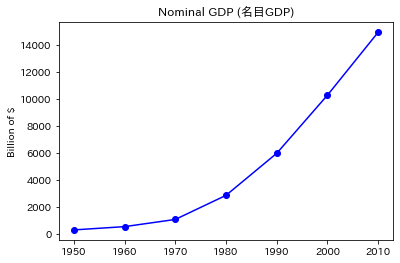

In [25]:
# !pip install japanize-matplotlib #モジュールのインストール
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

years = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
life_expectancy= [67.6, 71.9, 76.0, 78.8, 81.0, 82.8, 84.6]

plt.plot(years, life_expectancy, color = 'blue', marker = 'o', linestyle = 'solid')
plt.title('平均寿命')

plt.ylabel('歳')
plt.show()

## ファイル読み書きでのエンコーディングのエラーへの対応方法

続いて日本語のテキストを含むファイルの読み書きについてのTipsを紹介します。

日本語テキストのファイルの読み書きがうまく行かない場合があるかもしれません。

例えば、以下のような`text_df`という日本語テキストを含むテーブルデータがあったとします。

In [26]:
text = ['パイソン','１','分析', '科学', 
        '統計', '動的','あーる', '機械学習', '深層学習', '見識']
freq = [100, 40, 80, 21, 10, 3, 45, 79, 81, 3]
importance = [200, 180, 190, 50, 150, 30, 20, 40, 20, 90]

text_df = pd.DataFrame({'text':text, 'freq': freq, 'importance': importance})
text_df

,text,freq,importance
0,パイソン,100,200
1,１,40,180
2,分析,80,190
3,科学,21,50
4,統計,10,150
5,動的,3,30
6,あーる,45,20
7,機械学習,79,40
8,深層学習,81,20
9,見識,3,90


このデータを保存してみましょう。 
ここでは、テストのためencodingは`SHIFT-JIS`にしています。

In [27]:
text_df.to_csv('text_ja.csv', encoding='SHIFT-JIS')

このようなテーブルをエクセル等で作成すると環境によってencodingが異なりPythonでひらけない場合があります。
そのような場合は、エクセルデータ作成時に文字コードを指定したり、作成後に文字コードを変更したりすることで回避できます。
まずは、読み込みたいデータの文字コードは何かを把握するようにしましょう。
日本語ファイルで多く用いられている文字コードは`Shift-JIS`, `CP932`, `utf-8`などです。

例えば、pandasの`read_csv`ではデフォルトでは`encoding=utf-8`でファイルを読もうとします。そこに`Shift-JIS`などエンコードされたファイルをそのまま読もうとするとエラーになるはずです。

In [28]:
text_df_r = pd.read_csv('text_ja.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 0: invalid start byte

`UnicodeDecodeError`が確認されました。
このような場合はencodingを指定して読み込んでみましょう。encodingが何かを確認してから指定しましょう。

In [ ]:
text_df_r = pd.read_csv('text_ja.csv', index_col = 0, encoding = 'cp932')
text_df_r 

,text,freq,importance
0,パイソン,100,200
1,１,40,180
2,分析,80,190
3,科学,21,50
4,統計,10,150
5,動的,3,30
6,あーる,45,20
7,機械学習,79,40
8,深層学習,81,20
9,見識,3,90


無事に読み込めていることが確認されました。

## 正規表現（regular expression）

正規表現は文字列などを扱う上でとても便利です。ここでは、その基本的な使い方を紹介します。

ここでは正規表現の初歩とPythonでの扱い方を紹介します。

Pythonでの正規表現
- [公式ドキュメント](https://docs.python.org/ja/3/library/re.html)

普通の文字は全て正規表現です。

-　`a`という正規表現は`a`にマッチします。


正規表現の初歩（の初歩）

- `.`（ドット）は任意の一文字にマッチ


- `[]`で囲むと`[]`の中の文字のいずれかにマッチ
    - `[AB]C`は`AB`もしくは`AC`のいずれかにマッチ
    - `[123]0`は`10`,`20`,`30`のいずれかにマッチ
    - 全ての大文字アルファベットのいずれかにマッチは`[A-Z]`
    - 全ての整数値のいずれかにマッチは`[0-9]`
    
    
- `*`は直前の文字の0回以上の繰り返し（0回 == なくても良い）
    - `AKB[0-9]*`は`AKB49`にも`AKB`にも`AKB1`にもマッチ
    
    
- `(|)`はor（または）という意味になる
    - `(A|B)`は A or B（AまたはB）にマッチ
    
    
- ソフトなどによって微妙に記法など異なる場合もある。



正規表現は奥が深い...




- 深く学びたい人は[「詳説 正規表現」by Jeffrey Fried ](https://www.amazon.co.jp/%E6%AD%A3%E8%A6%8F%E8%A1%A8%E7%8F%BE-%E7%AC%AC3%E7%89%88-Jeffrey-F-Friedl/dp/4873113598/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&keywords=%E6%AD%A3%E8%A6%8F%E8%A1%A8%E7%8F%BE&qid=1560402782&s=gateway&sr=8-1)をどうぞ。

In [30]:
import re # Pythonで正規表現を扱うモジュール

# まずは、正規表現パターンを「正規表現オブジェクト」にコンパイルし、
# match()やsearch()などのメソッドを使ってマッチングに使えるようにします。

pat1 = re.compile('.')
pat2 = re.compile('[AB]')
pat3 = re.compile('[123]0')
pat4 = re.compile('AKB[0-9]*')
pat5 = re.compile('(A|B)')

In [31]:
# match()は文字列の先頭で0個以上の文字が正規表現パターンにマッチすれば対応するマッチオブジェクトを返します。
# 文字列がパターンにマッチしなければ None を返します

print(pat1.match('a') != None) # マッチすればTrueを返す
print(pat2.match('A') != None)
print(pat3.match('20') != None)
print(pat4.match('AKB49') != None)
print(pat5.match('A') != None)

True
True
True
True
True


In [32]:
# search()は文字列を走査し、正規表現パターンがマッチを生じさせる最初の場所を探して、対応するマッチオブジェクトを返します

print(pat1.search('a'))
print(pat2.search('A'))
print(pat3.search('20'))
print(pat4.search('AKB49'))
print(pat5.search('A'))

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 2), match='20'>
<re.Match object; span=(0, 5), match='AKB49'>
<re.Match object; span=(0, 1), match='A'>


In [33]:
# 文字列の置き換えはre.sub

その他文字列の処理でよく使うもの

- split()　　　　特定の文字列で文字列を分割
- startswith()　特定の文字列で文字列が始まるかを確認
- endswith()　  特定の文字列で文字列が終わるかを確認
- strip() 　　　文字列の先頭や末尾の特定の文字列や空白文字（スペース、タブ、改行）を削除
- replace()    文字列の置き換え

In [34]:
text1 = 'I am happy to hear it.'
text1.split( ) # spaceで文字列を区切る

['I', 'am', 'happy', 'to', 'hear', 'it.']

In [35]:
text2 = '@hogehoge Count me in!'
text2.startswith('@') # ’@’で始まるか確認

True

In [36]:
file1 = 'test_code.ipynb'
file1.endswith('.ipynb') # '.ipynb'で終わるか確認

True

In [37]:
text3 = '     We are able to attend a class.    '

text3.strip() # 文字列と最初の最後の空白文字を削除

'We are able to attend a class.'

In [38]:
text4 = "< aaaaabbbbbbcccccc >"
text4.strip("(<|>)") # 文字列と最初の最後の<または>を削除

' aaaaabbbbbbcccccc '

In [39]:
text5 = 'Hi Max.'
text5.replace('Max', 'Matrix') # Max を Matrixに置き換える

'Hi Matrix.'